# Project 2

In this project, you will implement the exploratory analysis plan developed in Project 1. This will lay the groundwork for our our first modeling exercise in Project 3.

### Step 1: Load the python libraries you will need for this project 

In [2]:
#imports
from __future__ import division
## importing datetools per the obsolete warning
from pandas.core import datetools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pylab as pl
##import numpy as np
%matplotlib inline

### Step 2: Read in your data set 

In [3]:
#Read in data from source 
df_raw = pd.read_csv("../assets/admissions.csv")
print df_raw.head()

   admit    gre   gpa  prestige
0      0  380.0  3.61       3.0
1      1  660.0  3.67       3.0
2      1  800.0  4.00       1.0
3      1  640.0  3.19       4.0
4      0  520.0  2.93       4.0


## Questions
#### Question 1. How many observations are in our dataset? 


In [6]:
df_raw.count()


admit       400
gre         398
gpa         398
prestige    399
dtype: int64

Answer: Data frame count() method returns the number of non-null observations for each column/series. We see that admit column has the highest number of observations - 400. However, it is possible that some of the rows in the data set are missing values in admit column. We will use len() method on the data frame to get the total number of rows in the dataset

In [8]:
print len(df_raw)

400


We have confirmed that the dataset has 400 rows, admin variable is populated for all rows; gre is not available in 2 rows, gpa is not available in 2 rows, prestige is not available in 1 row.

#### Question 2. Create a summary table

In [11]:
#data frame describe() method gives us the summary information about the data
df_raw.describe()

,admit,gre,gpa,prestige
count,400.000000,398.000000,398.00000,399.000000
mean,0.317500,588.040201,3.39093,2.486216
std,0.466087,115.628513,0.38063,0.945333
min,0.000000,220.000000,2.26000,1.000000
25%,0.000000,520.000000,3.13000,2.000000
50%,0.000000,580.000000,3.39500,2.000000
75%,1.000000,660.000000,3.67000,3.000000
max,1.000000,800.000000,4.00000,4.000000


#### Question 3. Why would GRE have a larger STD than GPA?

Answer: STD measures the extent of how far values differ from the mean. STD for GRE is higher than STD for GPA because GRE values are distributed on both ends further from the center than it is the case for GPA values. The median and mean of gpa are closer than the median and mean of gre.

#### Question 4. Drop data points with missing data


In [40]:
df_clean = df_raw.dropna()
print len(df_clean)
print len(df_raw)

397
400


In [41]:
df_clean.count()

admit       397
gre         397
gpa         397
prestige    397
dtype: int64

#### Question 5. Confirm that you dropped the correct data. How can you tell? 

Answer: The count() method of dataframe df_clean returns the same number of non-null observations for all columns/series and that number matches the value returned by len() method on that dataframe. The describe methods of df_clean and df_raw dataframes show us that the mean of all columns series is lower among the records with all variables populated; min and max values remained the same across all columns; STD for admit and gpa series is lower among the records with all values populated but it is higher gre and prestige; the quartile numbers are the same, except for 50% quartile of gpa going up in a "clean" dataset.

In [50]:
df_clean.describe()

,admit,gre,gpa,prestige
count,397.000000,397.000000,397.000000,397.000000
mean,0.317380,587.858942,3.392242,2.488665
std,0.466044,115.717787,0.380208,0.947083
min,0.000000,220.000000,2.260000,1.000000
25%,0.000000,520.000000,3.130000,2.000000
50%,0.000000,580.000000,3.400000,2.000000
75%,1.000000,660.000000,3.670000,3.000000
max,1.000000,800.000000,4.000000,4.000000


In [51]:
df_raw.describe()

,admit,gre,gpa,prestige
count,400.000000,398.000000,398.00000,399.000000
mean,0.317500,588.040201,3.39093,2.486216
std,0.466087,115.628513,0.38063,0.945333
min,0.000000,220.000000,2.26000,1.000000
25%,0.000000,520.000000,3.13000,2.000000
50%,0.000000,580.000000,3.39500,2.000000
75%,1.000000,660.000000,3.67000,3.000000
max,1.000000,800.000000,4.00000,4.000000


#### Question 6. Create box plots for GRE and GPA

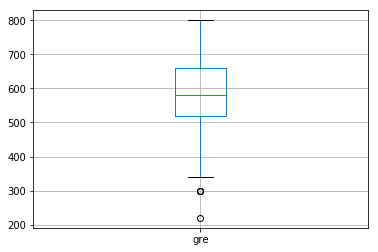

In [46]:
#boxplot 1
df_clean.boxplot(column='gre');

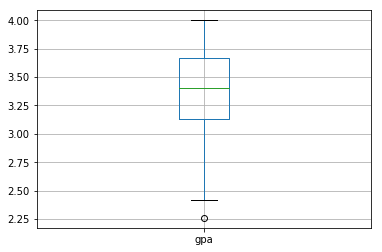

In [47]:
#boxplot 2 
df_clean.boxplot(column='gpa');

#### Question 7. What do this plots show?

Answer: Thes plots visualize distribution of data in gre and gpa columns. The green lines shows median (50% quartile), the box encompasses the first and third quartiles. The circles represent the outliers. The min values for both columns are outliers but gre has another value that is an outlier. This reflects in gre having higher STD than gpa column.

#### Question 8. Describe each distribution 

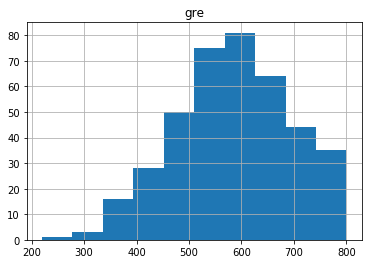

In [58]:
# plot the distribution of gre
df_clean.hist(column = 'gre');

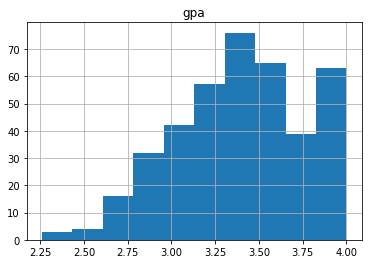

In [59]:
# plot the distribution of gpa
df_clean.hist(column = 'gpa');

#### Question 9.  If our model had an assumption of a normal distribution would we meet that requirement? 

Answer: The distribution of neither column has the symmetrical bell shape that characterises normal distribution, but gpe appears to be closer to normal distribution.

Below, we will test each column for normal distribution

In [68]:
import scipy as sy
print "GRE normal distribution test:"
sy.stats.mstats.normaltest(df_clean['gre'])

GRE normal distribution test:


NormaltestResult(statistic=3.8179829306094266, pvalue=0.14822980613776662)

In [70]:
print "GPA normal distribution test:"
sy.stats.mstats.normaltest(df_clean['gpa'])

GPA normal distribution test:


NormaltestResult(statistic=13.079875560916445, pvalue=0.001444578377229117)

Since pvalue for gre is above 0.05, the null hypothesis of the data coming from a normal distributon is not rejected. However, the null hypothesis is rejected for  Pvalue gpa due to pvalue lower than 0.05. 

#### Question 10.  Does this distribution need correction? If so, why? How? 

Answer: Outliers contribute to skewness of the data. Skewed data may lead to incorrect results of the data analysis. We can eliminate the outliers in order to correct the distribution of data.

#### Question 11. Which of our variables are potentially colinear? 

In [71]:
# create a correlation matrix for the data
df_clean.corr()

,admit,gre,gpa,prestige
admit,1.000000,0.181202,0.174116,-0.243563
gre,0.181202,1.000000,0.382408,-0.124533
gpa,0.174116,0.382408,1.000000,-0.060976
prestige,-0.243563,-0.124533,-0.060976,1.000000


#### Question 12. What did you find?

Answer: While looking at the data set while working on project 1, I assumed that it is logical for gre and gpa to be highly correlated. However, just by looking at the values, the hypothesis did not appear to be true. The correlation matrix above does not show a very close correlation between any of the variables, but the correlation between gre and gpa is the highest of all pairs.

#### Question 13. Write an analysis plan for exploring the association between grad school admissions rates and prestige of  undergraduate schools.

Answer: 1.Start with df_clean dataframe since it has null values eliminated.
        2.Test distribution of admin and prestige variables for normality using statistical tests and plotting the   
          variables. 
        3.If the tests reject the normal data distribution hypothesis, try using the smaller data set for the 
          analysis by eliminating the outliers.
        4.Create the correlation and covariance matrices for these two variables.

#### Question 14. What is your hypothesis? 

Answer: Prestige and admit have an inverse relationship: records with lower values in prestige column (higher rank of the undergrad school) are more likely to have a higher value in admit column (applicant is accepted). Plainly restated: applicants from higher ranked undergraduate schools are more likely to be admitted to a graduate school.

## Bonus/Advanced

#### 1. Bonus: Explore alternatives to dropping obervations with missing data

#### 2. Bonus: Log transform the skewed data

#### 3. Advanced: Impute missing data